<h1 style= "text-align:center ; font-family :Times New Roman; color :#004687 ; font-size: 40px">Supply Chain Management</h1>

<html>
    <head>
        <style>
            .img-container{
                display: flex;
            }
        </style>
    </head>
    <body>
        <div class="img-container">
            <center>
                <img src="gif-1.gif" width="300" height="10">
            </center>
        </div>
    </body>
</html>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Problem Statement</h1>

A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two years back. Their higher management has noticed that there is a mismatch in the demand and supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in inventory cost and ultimately loss to the company. Hence, the higher management wants to optimize the supply quantity in each and every warehouse in the entire country.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Goal</h1>

The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time from the respective warehouse.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Steps</h1>

* [Import Libraries](#Import-Libraries)

* [Load Datasets](#Load-Datasets)

* [Data Exploration](#Data-Exploration)

* [Data Cleaning](#Data-Cleaning)

* [Data Analysis and Visualization](#Data-Analysis-and-Visualization)
  
* [Data Transformation](#Data-Transformation)
  
* [Feature Selection](#Feature-Selection)
  
* [Splitting Dataset](#Splitting-Dataset)

* [Data Modelling](#Data-Modelling)

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Dictionary</h1>

* Ware_house_ID : Unique Warehouse id where product is prepared for dispatch
* WH_Manager_ID : Manager Id present in the warehouse
* zone : Zone of the Warehouse
* WH_regional_zone : Regional Zone of the warehouse
* num_refill_req_l3m :  Refilling request received by the warehouse in the last 3 months
* transport_issue_l1y : No. of transport issued for warehouse in last 1 year
* Competitor_in_mkt : No. of competitors in the market
* retail_shop_num : Number of retail shops who sell noodlesproduced by the warehouse
* wh_owner_type : The warehouse is owned by the company or it is on rent
* distributor_num : No. of distributor who works between warehouse and retail shops
* flood_impacted : Is the warehouse in a flood impacted area or not
* flood_proof : Warehouse is having flood proof indicator
* electric_supply : Does the warehouse have proper electric supply along with some power backup
* dist_from_hub : distance from the warehouse to production hub
* workers_num : no. workers in the warehouse
* wh_est_year : warehouse establishment year
* storage_issue_reported_l3m : storage issues reported by the warehouse in the last 3 months
* govt_check_l3m : Government checking in last 3 months
* temp_reg_mach : warehouse having temperature regulating machine indicator or not
* approved_wh_govt_certificate : Type of approval warehouse having been issued by government
* wh_breakdown_l3m : Number of times the warehouse faces thebreakdown in the last 3 months
* product_wg_ton : Product weight

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Import Libraries</h1>

In [312]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [313]:
import warnings
warnings.simplefilter(action='ignore')

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Load Datasets</h1>

In [314]:
# train dataset
df = pd.read_excel("Supply_train.xlsx")

# test dataset
df_test = pd.read_excel("Supply_test.xlsx")

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Exploration</h1>

In [315]:
# display first 5 rows from train data

df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Ware_house_ID,WH_100000,WH_100001,WH_100002,WH_100003,WH_100004
WH_Manager_ID,EID_50000,EID_50001,EID_50002,EID_50003,EID_50004
Location_type,Urban,Rural,Rural,Rural,Rural
WH_capacity_size,Small,Large,Mid,Mid,Large
zone,West,North,South,North,North
WH_regional_zone,Zone 6,Zone 5,Zone 2,Zone 3,Zone 5
num_refill_req_l3m,3,0,1,7,3
transport_issue_l1y,1,0,0,4,1
Competitor_in_mkt,2,4,4,2,2


In [316]:
# shape and size of train data

print("Shape : ", df.shape)
print("Size : ", df.size)

Shape :  (16620, 25)
Size :  415500


In [317]:
# shape and size of test data

print("Shape : ", df_test.shape)
print("Size : ", df_test.size)

Shape :  (5529, 25)
Size :  138225


In [318]:
#display all columns

print(df.columns)
print(' ')
print("Total columns in train dataset = ", len(df.columns))
print("Total columns in test dataset = ", len(df_test.columns))

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')
 
Total columns in train dataset =  25
Total columns in test dataset =  25


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [320]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

In [321]:
df.dtypes.value_counts()

int64      15
object      8
float64     2
Name: count, dtype: int64

In [322]:
# display two sample rows of columns with int dtype

df.select_dtypes(include='int64').sample(2).T

,10080,11142
Unnamed: 0,10080,11142
num_refill_req_l3m,3,6
transport_issue_l1y,0,1
Competitor_in_mkt,3,2
retail_shop_num,4463,5092
distributor_num,24,70
flood_impacted,1,0
flood_proof,0,0
electric_supply,1,1
dist_from_hub,209,116


In [323]:
# display two sample rows of columns with object dtype

df.select_dtypes(include='object').sample(2).T

,2088,9778
Ware_house_ID,WH_102088,WH_109778
WH_Manager_ID,EID_52088,EID_59778
Location_type,Rural,Rural
WH_capacity_size,Large,Large
zone,West,South
WH_regional_zone,Zone 6,Zone 5
wh_owner_type,Rented,Rented
approved_wh_govt_certificate,B,A+


In [324]:
# display two sample rows of columns with float dtype

df.select_dtypes(include='float64').sample(2).T

,9599,7824
workers_num,31.0,25.0
wh_est_year,NaN,NaN


In [325]:
for i in df:
    print(i)
    print(df[i].unique())
    print("Length of unique values in column ", i, ' :', len(df[i].unique()))
    print(' ')

Unnamed: 0
[    0     1     2 ... 16617 16618 16619]
Length of unique values in column  Unnamed: 0  : 16620
 
Ware_house_ID
['WH_100000' 'WH_100001' 'WH_100002' ... 'WH_116617' 'WH_116618'
 'WH_116619']
Length of unique values in column  Ware_house_ID  : 16620
 
WH_Manager_ID
['EID_50000' 'EID_50001' 'EID_50002' ... 'EID_66617' 'EID_66618'
 'EID_66619']
Length of unique values in column  WH_Manager_ID  : 16620
 
Location_type
['Urban' 'Rural']
Length of unique values in column  Location_type  : 2
 
WH_capacity_size
['Small' 'Large' 'Mid']
Length of unique values in column  WH_capacity_size  : 3
 
zone
['West' 'North' 'South' 'East']
Length of unique values in column  zone  : 4
 
WH_regional_zone
['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
Length of unique values in column  WH_regional_zone  : 6
 
num_refill_req_l3m
[3 0 1 7 8 4 6 5 2]
Length of unique values in column  num_refill_req_l3m  : 9
 
transport_issue_l1y
[1 0 4 3 2 5]
Length of unique values in column  transport_i

In [326]:
df.describe().round(2)

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.00,16620.00,16620.00,16620.00,16620.00,16620.00,16620.0,16620.00,16620.00,16620.00,15953.00,8760.00,16620.00,16620.00,16620.00,16620.00,16620.00
mean,8309.50,4.13,0.78,3.10,4983.90,42.47,0.1,0.06,0.66,163.52,28.91,2009.35,17.13,0.31,3.49,18.73,22098.42
std,4797.93,2.61,1.21,1.15,1051.03,16.09,0.3,0.23,0.48,62.70,7.84,7.54,9.16,0.46,1.69,8.62,11620.34
min,0.00,0.00,0.00,0.00,1821.00,15.00,0.0,0.00,0.00,55.00,10.00,1996.00,0.00,0.00,0.00,1.00,2093.00
25%,4154.75,2.00,0.00,2.00,4309.00,29.00,0.0,0.00,0.00,109.00,24.00,2003.00,10.00,0.00,2.00,11.00,13057.00
50%,8309.50,4.00,0.00,3.00,4856.00,42.00,0.0,0.00,1.00,164.00,28.00,2009.00,18.00,0.00,3.00,19.00,22099.00
75%,12464.25,6.00,1.00,4.00,5500.00,56.00,0.0,0.00,1.00,218.00,33.00,2016.00,24.00,1.00,5.00,26.00,30103.00
max,16619.00,8.00,5.00,12.00,11008.00,70.00,1.0,1.00,1.00,271.00,98.00,2023.00,39.00,1.00,6.00,32.00,55151.00


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Cleaning</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Train Data</h1>

In [327]:
# display number of unique values in each column

df.nunique().sort_values(ascending=False)

Unnamed: 0                      16620
WH_Manager_ID                   16620
Ware_house_ID                   16620
retail_shop_num                  4356
product_wg_ton                   4248
dist_from_hub                     217
workers_num                        60
distributor_num                    56
storage_issue_reported_l3m         37
govt_check_l3m                     32
wh_est_year                        28
Competitor_in_mkt                  12
num_refill_req_l3m                  9
wh_breakdown_l3m                    7
transport_issue_l1y                 6
WH_regional_zone                    6
approved_wh_govt_certificate        5
zone                                4
WH_capacity_size                    3
flood_proof                         2
flood_impacted                      2
temp_reg_mach                       2
Location_type                       2
wh_owner_type                       2
electric_supply                     2
dtype: int64

In [328]:
df.drop(columns=['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID'], inplace = True)

In [329]:
print(len(df[df.duplicated]))

0


In [330]:
# Missing values

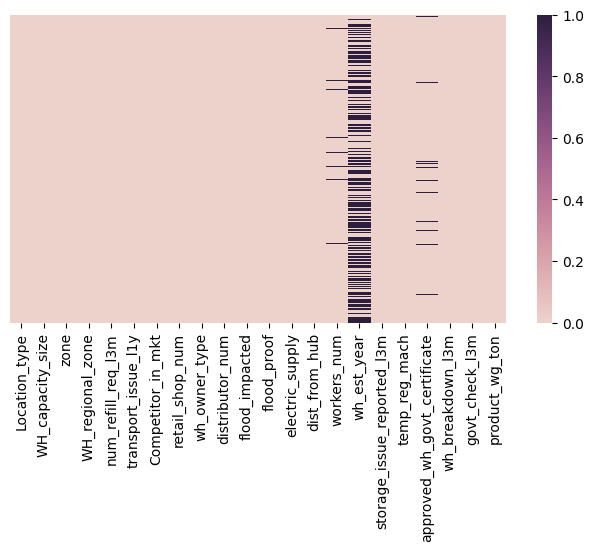

In [331]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), yticklabels=False, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [332]:
# print percentage of null values in each column

null_values_features = [i for i in df.columns if df[i].isnull().sum()>1]
for i in null_values_features:
    print(i, np.round(df[i].isnull().mean()*100, 2), "% missing values")

workers_num 4.01 % missing values
wh_est_year 47.29 % missing values
approved_wh_govt_certificate 3.6 % missing values


In [333]:
df.drop(columns=['wh_est_year'], inplace = True)

In [334]:
df['workers_num'].mean()

28.911490001880523

In [335]:
df['approved_wh_govt_certificate'].mode()

0    C
Name: approved_wh_govt_certificate, dtype: object

In [336]:
df['workers_num'].fillna(int(df['workers_num'].mean()), inplace=True)

In [337]:
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0], inplace=True)

In [338]:
df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [339]:
# outliers

In [340]:
df.nunique().sort_values(ascending= True)

Location_type                      2
temp_reg_mach                      2
electric_supply                    2
flood_proof                        2
wh_owner_type                      2
flood_impacted                     2
WH_capacity_size                   3
zone                               4
approved_wh_govt_certificate       5
WH_regional_zone                   6
transport_issue_l1y                6
wh_breakdown_l3m                   7
num_refill_req_l3m                 9
Competitor_in_mkt                 12
govt_check_l3m                    32
storage_issue_reported_l3m        37
distributor_num                   56
workers_num                       60
dist_from_hub                    217
product_wg_ton                  4248
retail_shop_num                 4356
dtype: int64

In [341]:
for i in df.columns[df.nunique()<=4]:
    print("Number of unique values in column ", i, ' :', len(df[i].unique()))
    print(df[i].value_counts())
    print(' ')

Number of unique values in column  Location_type  : 2
Location_type
Rural    15272
Urban     1348
Name: count, dtype: int64
 
Number of unique values in column  WH_capacity_size  : 3
WH_capacity_size
Large    6743
Mid      6691
Small    3186
Name: count, dtype: int64
 
Number of unique values in column  zone  : 4
zone
North    6800
West     5320
South    4223
East      277
Name: count, dtype: int64
 
Number of unique values in column  wh_owner_type  : 2
wh_owner_type
Company Owned    8975
Rented           7645
Name: count, dtype: int64
 
Number of unique values in column  flood_impacted  : 2
flood_impacted
0    15010
1     1610
Name: count, dtype: int64
 
Number of unique values in column  flood_proof  : 2
flood_proof
0    15689
1      931
Name: count, dtype: int64
 
Number of unique values in column  electric_supply  : 2
electric_supply
1    10898
0     5722
Name: count, dtype: int64
 
Number of unique values in column  temp_reg_mach  : 2
temp_reg_mach
0    11532
1     5088
Name: coun

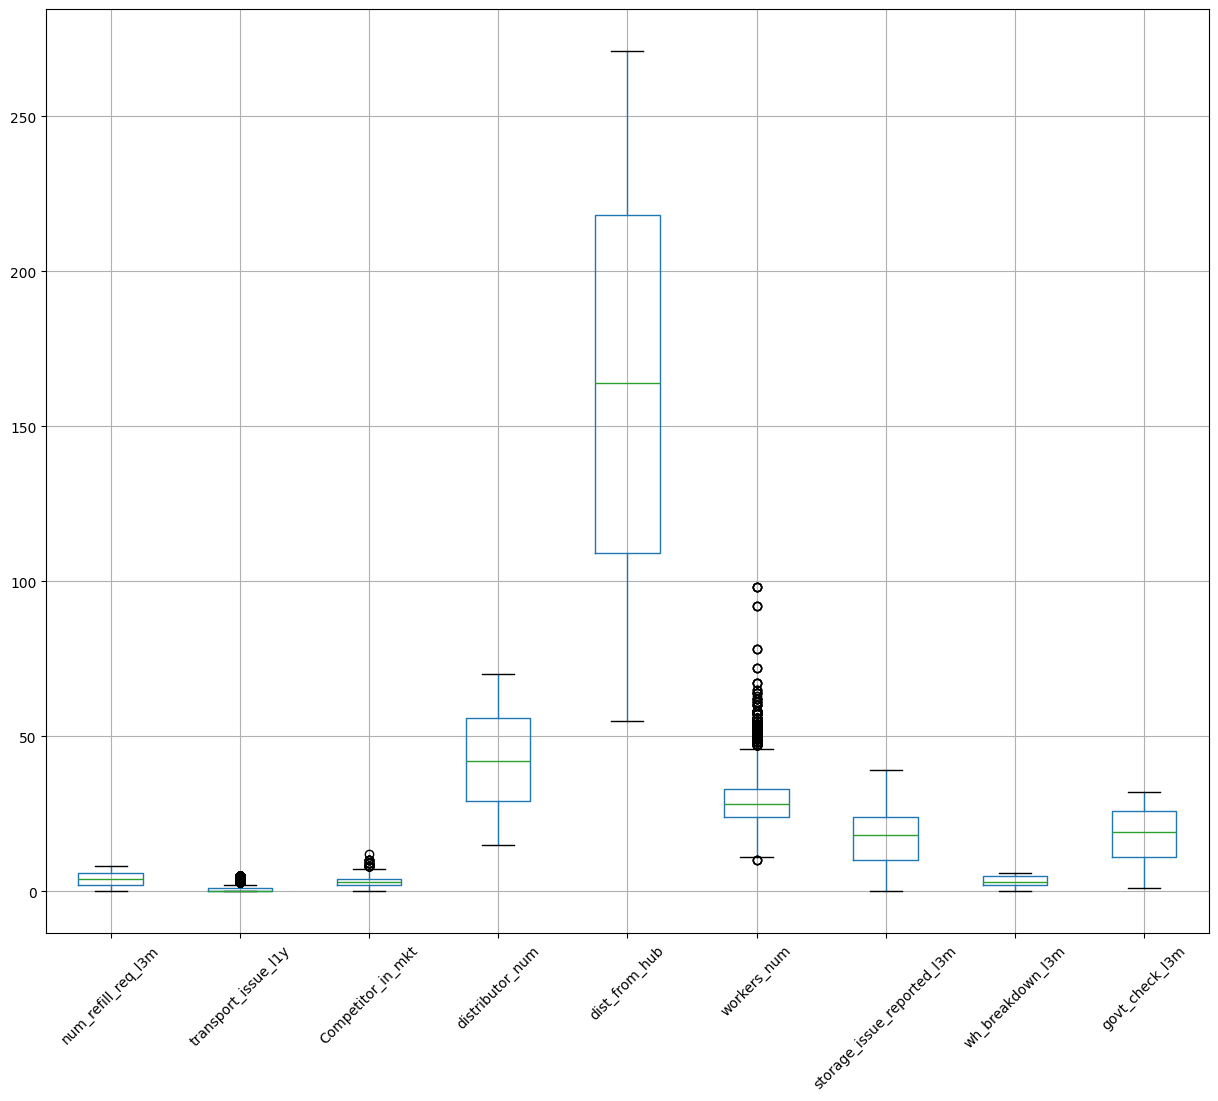

In [342]:
num_columns = df.select_dtypes(include=['int', 'float'])
num_columns.drop(columns=['product_wg_ton', 'retail_shop_num'], inplace=True)
num_columns.drop(columns=num_columns.columns[num_columns.nunique()<=4], inplace=True)
plt.figure(figsize=(15, 12))
num_columns.boxplot()
plt.xticks(rotation=45)
plt.show()

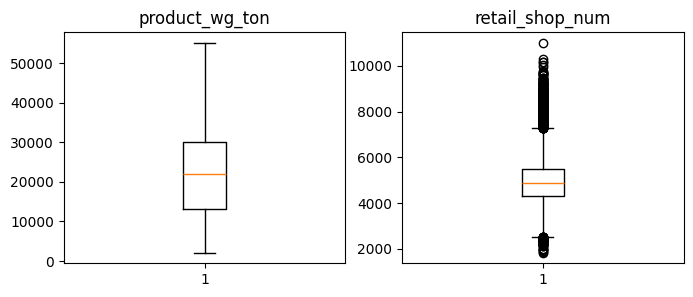

In [343]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot2grid((1, 2), (0, 0))

plt.boxplot(df.product_wg_ton)
plt.title('product_wg_ton')

ax2 = plt.subplot2grid((1, 2), (0, 1))

plt.boxplot(df.retail_shop_num)
plt.title('retail_shop_num')

plt.show()

In [344]:
def count_outliers(df):
    outliers={}
    for i in df.columns:
        if pd.api.types.is_numeric_dtype(df[i]):
            q1 = df[i].quantile(0.25)
            q3 = df[i].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5*iqr
            upper = q3 + 1.5*iqr
            outliers[i] = df[(df[i] < lower) | (df[i] > upper)].shape[0]
        else:
            pass
    return outliers

In [345]:
outlier_counts = count_outliers(df)
outlier_counts

{'num_refill_req_l3m': 0,
 'transport_issue_l1y': 2017,
 'Competitor_in_mkt': 62,
 'retail_shop_num': 623,
 'distributor_num': 0,
 'flood_impacted': 1610,
 'flood_proof': 931,
 'electric_supply': 0,
 'dist_from_hub': 0,
 'workers_num': 395,
 'storage_issue_reported_l3m': 0,
 'temp_reg_mach': 0,
 'wh_breakdown_l3m': 0,
 'govt_check_l3m': 0,
 'product_wg_ton': 0}

In [346]:
df['product_wg_ton'].corr(df['flood_proof'])

-0.0038619038188224156

In [347]:
df['product_wg_ton'].corr(df['flood_impacted'])

-0.0005071598474498184

In [348]:
df.drop(columns=['flood_proof', 'flood_impacted'], inplace = True)

In [349]:
def remove_outliers(df):
    num_df = df.select_dtypes(include=['int', 'float'])
    q1 = num_df.quantile(0.25)
    q3 = num_df.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df_no_outliers = num_df[((num_df >= lower) & (num_df <= upper)).all(axis=1)]
    return df.loc[df_no_outliers.index]

In [350]:
df = remove_outliers(df)
df.shape

(13661, 19)

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Test Data</h1>

In [351]:
# display number of unique values in each column

df_test.nunique().sort_values(ascending=False)

Unnamed: 0                      5529
Ware_house_ID                   5529
WH_Manager_ID                   5529
product_wg_ton                  2946
retail_shop_num                 2891
dist_from_hub                    217
distributor_num                   56
workers_num                       55
storage_issue_reported_l3m        37
govt_check_l3m                    32
wh_est_year                       28
num_refill_req_l3m                 9
Competitor_in_mkt                  9
wh_breakdown_l3m                   7
WH_regional_zone                   6
transport_issue_l1y                6
approved_wh_govt_certificate       5
zone                               4
WH_capacity_size                   3
electric_supply                    2
temp_reg_mach                      2
flood_impacted                     2
Location_type                      2
wh_owner_type                      2
flood_proof                        2
dtype: int64

In [352]:
df_test.drop(columns=['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID'], inplace = True)

In [353]:
print(len(df_test[df_test.duplicated]))

0


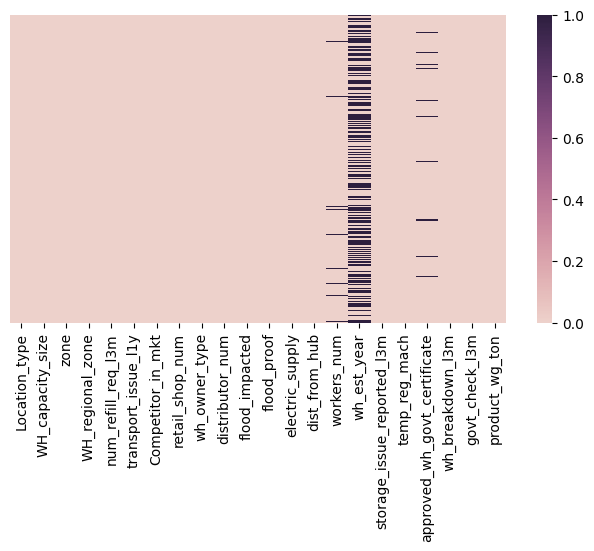

In [354]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_test.isnull(), yticklabels=False, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [355]:
# print percentage of null values in each column

null_values_features = [i for i in df_test.columns if df_test[i].isnull().sum()>1]
for i in null_values_features:
    print(i, np.round(df_test[i].isnull().mean()*100, 2), "% missing values")

workers_num 3.8 % missing values
wh_est_year 48.56 % missing values
approved_wh_govt_certificate 3.73 % missing values


In [356]:
df_test.drop(columns=['wh_est_year'], inplace = True)

In [357]:
df_test['workers_num'].mean()

29.010528294792255

In [358]:
df_test['approved_wh_govt_certificate'].mode()

0    C
Name: approved_wh_govt_certificate, dtype: object

In [359]:
df_test['workers_num'].fillna(int(df_test['workers_num'].mean()), inplace=True)

In [360]:
df_test['approved_wh_govt_certificate'].fillna(df_test['approved_wh_govt_certificate'].mode()[0], inplace=True)

In [361]:
df_test.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [362]:
# Outliers

In [363]:
df_test.nunique().sort_values(ascending= True)

Location_type                      2
temp_reg_mach                      2
electric_supply                    2
flood_proof                        2
wh_owner_type                      2
flood_impacted                     2
WH_capacity_size                   3
zone                               4
approved_wh_govt_certificate       5
WH_regional_zone                   6
transport_issue_l1y                6
wh_breakdown_l3m                   7
Competitor_in_mkt                  9
num_refill_req_l3m                 9
govt_check_l3m                    32
storage_issue_reported_l3m        37
workers_num                       55
distributor_num                   56
dist_from_hub                    217
retail_shop_num                 2891
product_wg_ton                  2946
dtype: int64

In [364]:
for i in df_test.columns[df_test.nunique()<=4]:
    print("Number of unique values in column ", i, ' :', len(df_test[i].unique()))
    print(df_test[i].value_counts())
    print(' ')

Number of unique values in column  Location_type  : 2
Location_type
Rural    5061
Urban     468
Name: count, dtype: int64
 
Number of unique values in column  WH_capacity_size  : 3
WH_capacity_size
Large    2225
Mid      2211
Small    1093
Name: count, dtype: int64
 
Number of unique values in column  zone  : 4
zone
North    2269
West     1734
South    1421
East      105
Name: count, dtype: int64
 
Number of unique values in column  wh_owner_type  : 2
wh_owner_type
Company Owned    3059
Rented           2470
Name: count, dtype: int64
 
Number of unique values in column  flood_impacted  : 2
flood_impacted
0    4953
1     576
Name: count, dtype: int64
 
Number of unique values in column  flood_proof  : 2
flood_proof
0    5253
1     276
Name: count, dtype: int64
 
Number of unique values in column  electric_supply  : 2
electric_supply
1    3634
0    1895
Name: count, dtype: int64
 
Number of unique values in column  temp_reg_mach  : 2
temp_reg_mach
0    3879
1    1650
Name: count, dtype: 

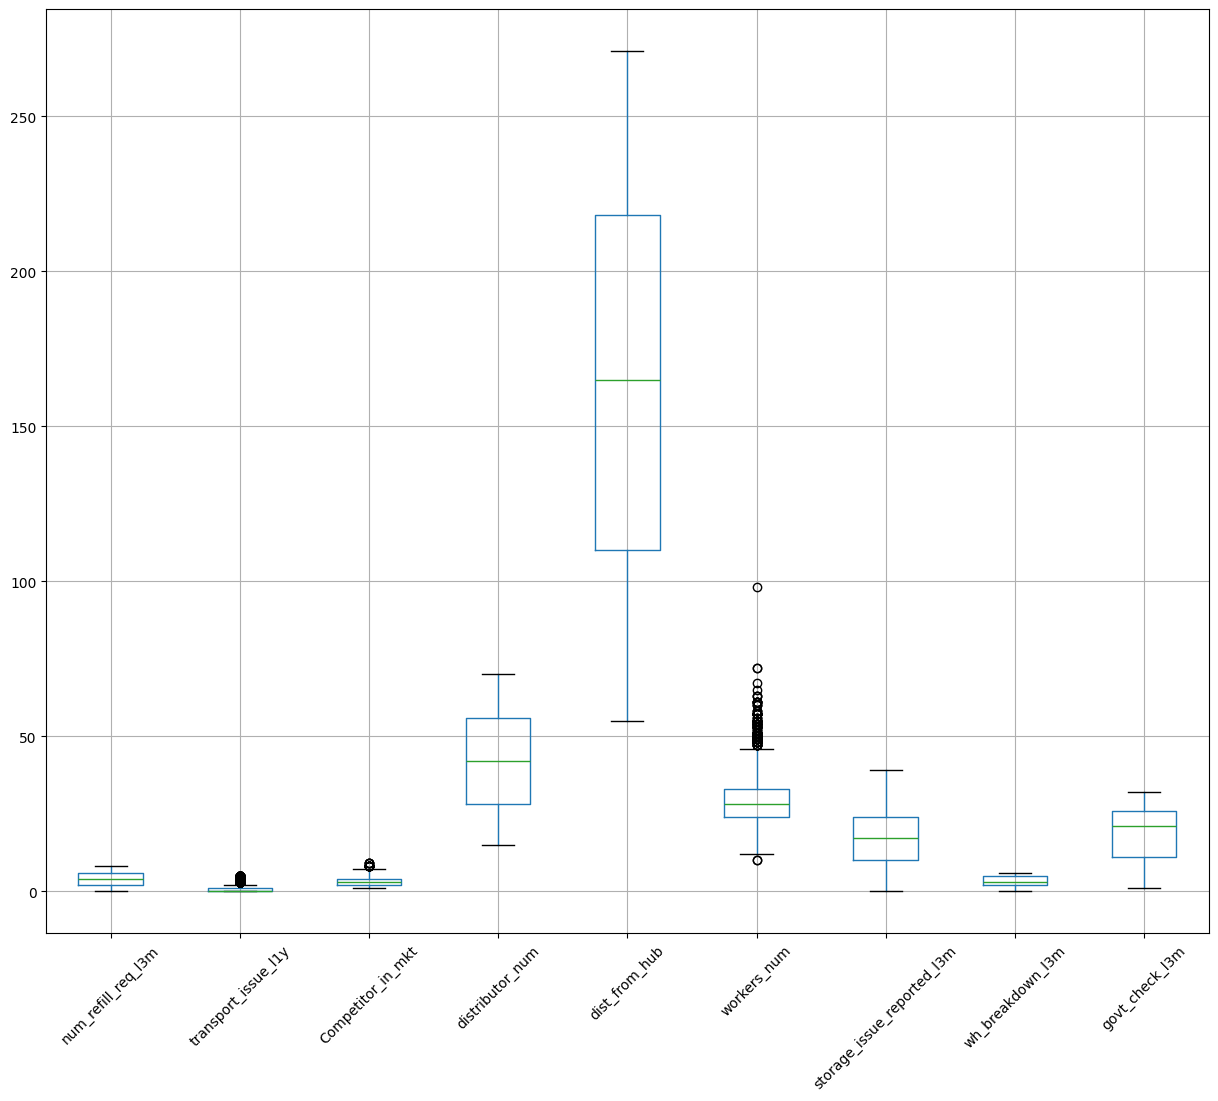

In [365]:
num_columns = df_test.select_dtypes(include=['int', 'float'])
num_columns.drop(columns=['product_wg_ton', 'retail_shop_num'], inplace=True)
num_columns.drop(columns=num_columns.columns[num_columns.nunique()<=4], inplace=True)
plt.figure(figsize=(15, 12))
num_columns.boxplot()
plt.xticks(rotation=45)
plt.show()

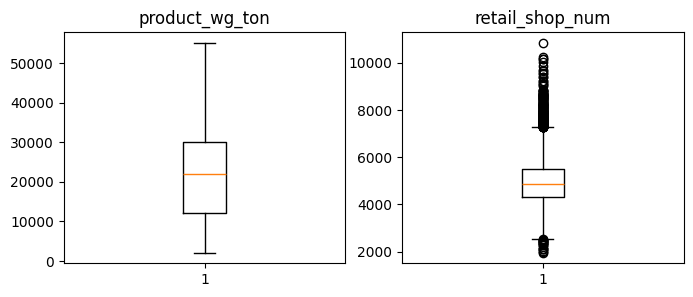

In [366]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot2grid((1, 2), (0, 0))

plt.boxplot(df_test.product_wg_ton)
plt.title('product_wg_ton')

ax2 = plt.subplot2grid((1, 2), (0, 1))

plt.boxplot(df_test.retail_shop_num)
plt.title('retail_shop_num')

plt.show()

In [367]:
def count_outliers(df_test):
    outliers={}
    for i in df_test.columns:
        if pd.api.types.is_numeric_dtype(df_test[i]):
            q1 = df_test[i].quantile(0.25)
            q3 = df_test[i].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5*iqr
            upper = q3 + 1.5*iqr
            outliers[i] = df_test[(df_test[i] < lower) | (df_test[i] > upper)].shape[0]
        else:
            pass
    return outliers

In [368]:
outlier_counts = count_outliers(df_test)
outlier_counts

{'num_refill_req_l3m': 0,
 'transport_issue_l1y': 610,
 'Competitor_in_mkt': 23,
 'retail_shop_num': 205,
 'distributor_num': 0,
 'flood_impacted': 576,
 'flood_proof': 276,
 'electric_supply': 0,
 'dist_from_hub': 0,
 'workers_num': 138,
 'storage_issue_reported_l3m': 0,
 'temp_reg_mach': 0,
 'wh_breakdown_l3m': 0,
 'govt_check_l3m': 0,
 'product_wg_ton': 0}

In [369]:
df_test['product_wg_ton'].corr(df_test['flood_proof'])

-0.0027325248706028256

In [370]:
df_test['product_wg_ton'].corr(df_test['flood_impacted'])

-0.01821115716452153

In [371]:
df_test.drop(columns=['flood_proof', 'flood_impacted'], inplace = True)

In [372]:
def remove_outliers(df_test):
    num_df = df_test.select_dtypes(include=['int', 'float'])
    q1 = num_df.quantile(0.25)
    q3 = num_df.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df_no_outliers = num_df[((num_df >= lower) & (num_df <= upper)).all(axis=1)]
    return df_test.loc[df_no_outliers.index]

In [373]:
df_test = remove_outliers(df_test)

In [374]:
df_test.shape

(4599, 19)

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Summary</h1>

##### The dataset was given as two seperate sets for training and testing purposes.
##### Out of the 25 columns, six were removed, likely due to irrelevancy and null values.
##### Duplicate rows were not present in the dataset.
##### outliers were detected and removed.
##### Additionally, all missing values were handled appropriately, ensuring the dataset was prepared for data analysis.
##

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Analysis and Visualization</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Warehouse location type & Owner Type</h1>

  Location_type  product_wg_ton
0         Rural       281875428
1         Urban        28143039
  
   wh_owner_type  product_wg_ton
0  Company Owned       166333530
1         Rented       143684937
  


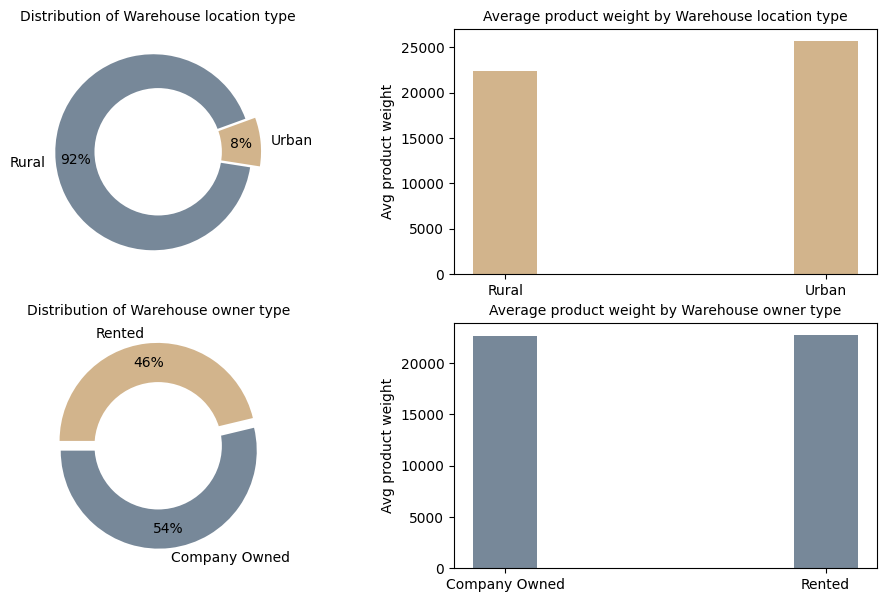

In [375]:
plt.figure(figsize=(12, 7))


# Warehouse location type
# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0))

print(df.groupby('Location_type')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

df['Location_type'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'tan'], autopct='%1.0f%%', explode=(0.05, 0.05),
                                     startangle=20, ylabel=' ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Warehouse location type', fontsize=10)

#plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1))

x = df.groupby('Location_type')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='tan', width=0.2)
plt.title('Average product weight by Warehouse location type', fontsize=10)
plt.ylabel('Avg product weight')

# Warehouse Owner Type

# plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0))
print(df.groupby('wh_owner_type')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

df['wh_owner_type'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'tan'], autopct='%1.0f%%', explode=(0.05, 0.05),
                                     startangle=180, ylabel=' ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Warehouse owner type', fontsize=10)

# plot 4
ax4 = plt.subplot2grid((2, 2), (1, 1))

x = df.groupby('wh_owner_type')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='lightslategrey', width=0.2)
plt.title('Average product weight by Warehouse owner type', fontsize=10)
plt.ylabel('Avg product weight')

plt.show()

#### Location type
* Urban areas account for 8 % of the total, while rural areas make up the remaining 92 %.
* The average product weight in rural areas is higher than of urban areas.
* The total product weight in rural areas far exceeds that of urban areas.

#### Owner type
* The first graph illustrates the distribution of warehouse ownership, revealing that 46% of warehouses are rented, while 54% are owned by companies.
* The average product weight in both types of warehouses appears to be nearly identical.
* This data shows a slightly higher total product weight in company-owned warehouses despite their minority in distribution.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Electric_supply & temp_reg_mach availability</h1>

   temp_reg_mach  product_wg_ton
0              0       208418842
1              1       101599625
  
   electric_supply  product_wg_ton
1                1       203327830
0                0       106690637
  


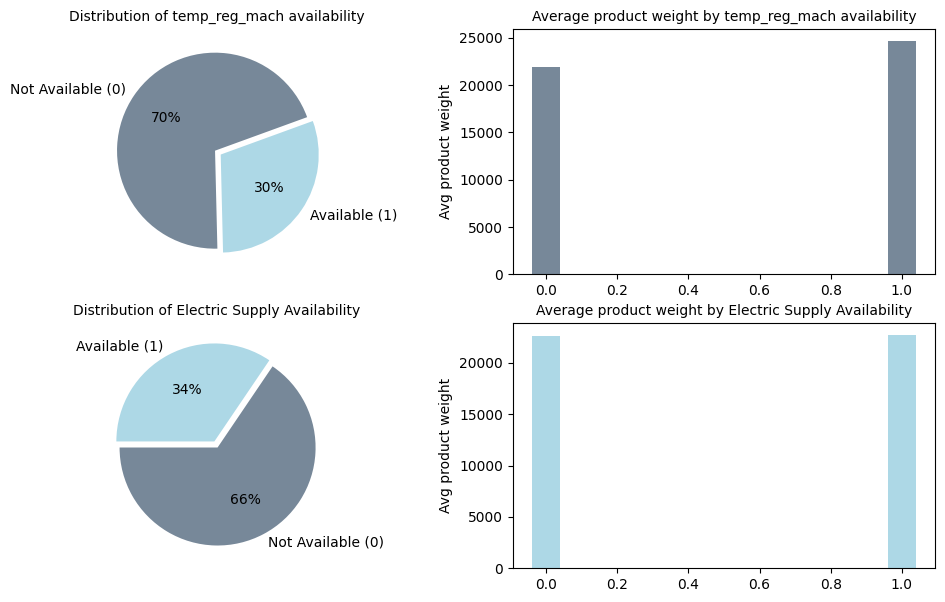

In [376]:
plt.figure(figsize=(12, 7))


# Temperature regulating machine availability
# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0))

print(df.groupby('temp_reg_mach')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

df['temp_reg_mach'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'lightblue'], autopct='%1.0f%%', explode=(0.02, 0.05),
                                     startangle=20, ylabel=' ', labels = ['Not Available (0)', 'Available (1)'])

plt.title('Distribution of temp_reg_mach availability', fontsize=10)

#plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1))

x = df.groupby('temp_reg_mach')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='lightslategrey', width=0.08)
plt.title('Average product weight by temp_reg_mach availability', fontsize=10)
plt.ylabel('Avg product weight')

# Electric Supply Availability

# plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0))
print(df.groupby('electric_supply')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

df['electric_supply'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'lightblue'], autopct='%1.0f%%', explode=(0.02, 0.05),
                                     startangle=180, ylabel=' ', labels = ['Not Available (0)', 'Available (1)'])

plt.title('Distribution of Electric Supply Availability', fontsize=10)

# plot 4
ax4 = plt.subplot2grid((2, 2), (1, 1))

x = df.groupby('electric_supply')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='lightblue', width=0.08)
plt.title('Average product weight by Electric Supply Availability', fontsize=10)
plt.ylabel('Avg product weight')

plt.show()

#### Electric_supply
* 66% of the warehouses surveyed were found to be unavailable, while the remaining 34% were deemed accessible for electric supply.e 
 The average product weight in the electric supply not available warehouses was lower in comparison to those that were accessible for use.
* Among the available warehouses, total product weight amounted to 203,327,830 units, whereas the not available warehouses collectively held a total   product weight of 106,690,637 units*

#### Temp_reg_mach availabilit
* The data indicates that the availability of temperature regulating machines in warehouses is limited, with 66% of warehouses reporting unavailability, while only 34% have these machines accessible.
* Despite the lower availability, warehouses with temperature regulating machines available account for a total product weight of 101,599,625 units, compared to 208,418,842 units in warehouses where they are not available.
* The average product weight in warehouses without temperature regulating machines is lower than in those where they are available**

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Storage issue reported in the last 3 months</h1>

Unique values in Storage issue reported [13  4 17 18 23 24 11 22  6  9 29 19 14 28 25 12 34 16  0 38 21 15 36 31
 20 10 32 27 26  8  7 37 30  5 39 33 35]
  
    storage_issue_reported_l3m  product_wg_ton
21                          24        24080546
22                          25        22163669
17                          20        15001573
20                          23        14700697
19                          22        13999109
  


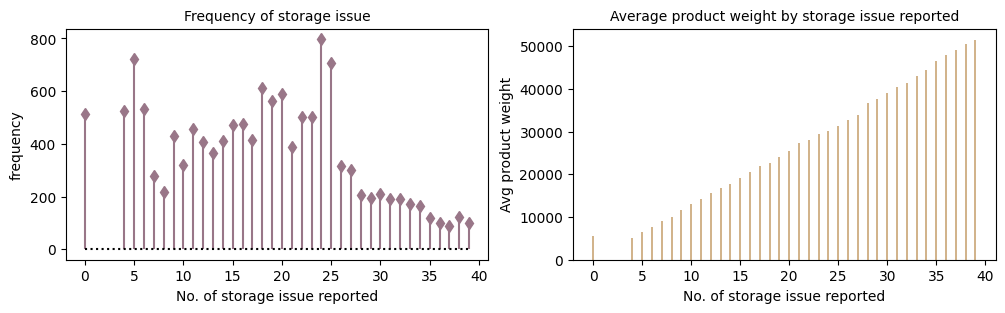

In [377]:
print("Unique values in Storage issue reported", df['storage_issue_reported_l3m'].unique())
print('  ')
print(df.groupby('storage_issue_reported_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))


# storage issue reported in the last 3 months        
# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['storage_issue_reported_l3m'].value_counts()

plt.stem(x.index, x.values, linefmt='#997688', basefmt='k:', markerfmt='d')
plt.xlabel('No. of storage issue reported')
plt.ylabel('frequency')
plt.title('Frequency of storage issue', fontsize=10)

# plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('storage_issue_reported_l3m')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='tan', width=0.2)
plt.title('Average product weight by storage issue reported', fontsize=10)
plt.xlabel('No. of storage issue reported')
plt.ylabel('Avg product weight')

plt.show()

#### Storage issue reported in the last 3 months
* The variables demonstrate a strong correlation, exhibiting an almost linear relationship.
*  As the product weight rises, storage issues likewise increases.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">No. of warehouse breakdown in the last 3 months</h1>

Unique values in no. of warehouse breakdown [5 3 6 4 2 1 0]
  
   wh_breakdown_l3m  product_wg_ton
3                 3        61995867
2                 2        61208196
4                 4        57532304
6                 6        57127942
5                 5        56507740
  


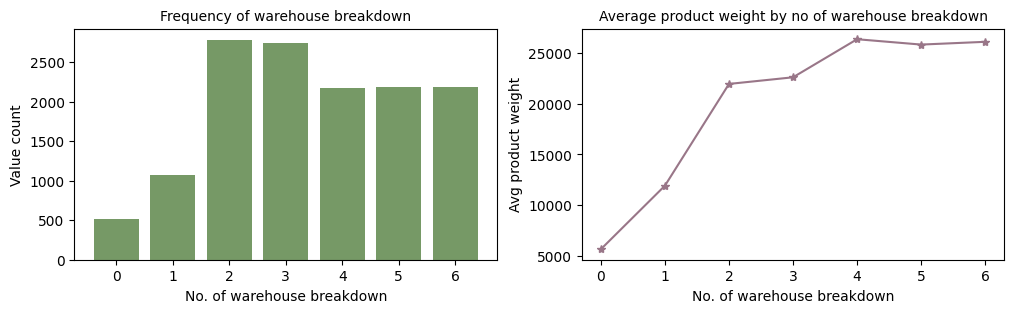

In [378]:
print("Unique values in no. of warehouse breakdown" , df['wh_breakdown_l3m'].unique())
print('  ')
print(df.groupby('wh_breakdown_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))


# no. of warehouse breakdown in the last 3 months        
# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['wh_breakdown_l3m'].value_counts()

plt.bar(x.index, x.values, color='#769966')
plt.xlabel('No. of warehouse breakdown')
plt.ylabel('Value count')
plt.title('Frequency of warehouse breakdown', fontsize=10)

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('wh_breakdown_l3m')['product_wg_ton'].mean()
plt.plot(x.index, x.values, color='#997688', marker='*')
plt.xlabel('No. of warehouse breakdown')
plt.ylabel('Avg product weight')
plt.title('Average product weight by no of warehouse breakdown', fontsize=10)

plt.show()

#### No. of warehouse breakdown in the last 3 months
* The variables demonstrate a positive correlation, indicating that as the product weight increases,
  the frequency of warehouse breakdowns also tends to rise.
* The total product weight is higher for values with most value count.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">zone & Regional_zone</h1>

Unique values in zone ['West' 'North' 'South' 'East']
  
    zone  product_wg_ton
1  North       127606629
3   West        99413525
2  South        78416832
0   East         4581481
  
Unique values in regional zone ['Zone 6' 'Zone 5' 'Zone 2' 'Zone 1' 'Zone 4' 'Zone 3']
  
  WH_regional_zone  product_wg_ton
5           Zone 6       102467086
4           Zone 5        58182480
3           Zone 4        50846244
1           Zone 2        38456471
2           Zone 3        36534918
0           Zone 1        23531268
  


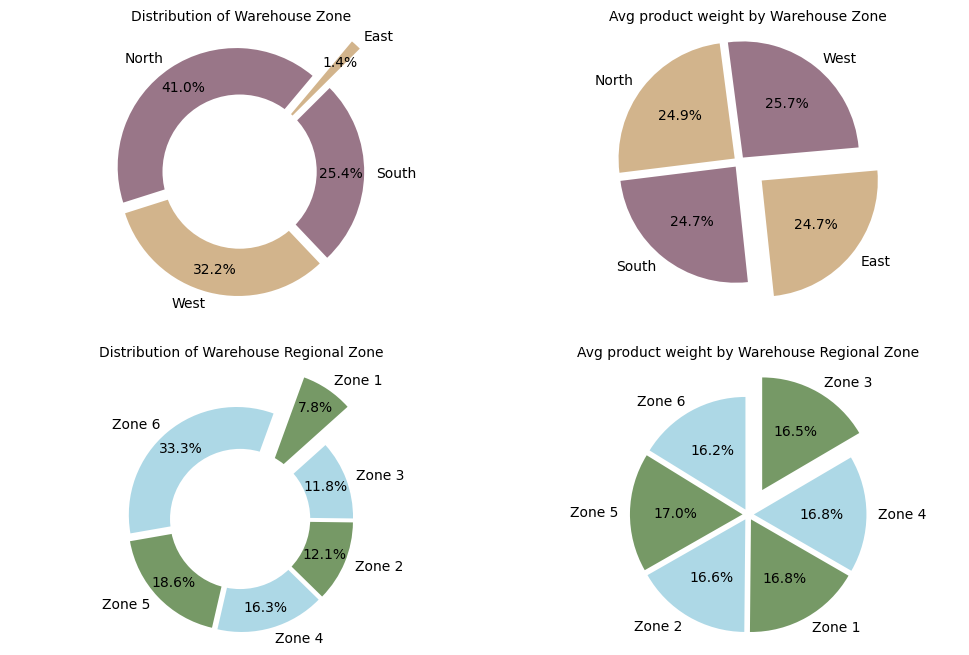

In [379]:
# zone

print("Unique values in zone" , df['zone'].unique())
print('  ')
print(df.groupby('zone')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

# regional zone

print("Unique values in regional zone" , df['WH_regional_zone'].unique())
print('  ')
print(df.groupby('WH_regional_zone')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 8))

# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0))

df['zone'].value_counts().plot(kind = 'pie', colors = ['#997688', 'tan'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.45),
                                     startangle=50, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Warehouse Zone', fontsize=10)

# plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1))


x = df.groupby('zone')['product_wg_ton'].mean()
labels= df['zone'].unique()
plt.pie(x, colors =['#997688', 'tan'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.25), startangle=5, labels = labels)
plt.axis('equal')
plt.title('Avg product weight by Warehouse Zone', fontsize=10)

# Regional zone
# plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0))

df['WH_regional_zone'].value_counts().plot(kind = 'pie', colors = ['lightblue', '#769966'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.45),
                                     startangle=70, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Warehouse Regional Zone', fontsize=10)

# plot 4
ax4 = plt.subplot2grid((2, 2), (1, 1))


x = df.groupby('WH_regional_zone')['product_wg_ton'].mean()
labels= df['WH_regional_zone'].unique()
plt.pie(x, colors =['lightblue', '#769966'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.25), startangle=90, labels = labels)
plt.axis('equal')
plt.title('Avg product weight by Warehouse Regional Zone', fontsize=10)

plt.show()

#### zone 
* The North Zone exhibits the highest production levels, whereas the East Zone demonstrates the lowest production levels.
* On the other hand, the subsequent chart illustrates minimal fluctuations in product weight across different zones.
* The total product weight tends to be greater for values that occur most frequently.


#### Regional_zone
* The Regional Zone 6 exhibits a significant number of warehouses.
* 
Meanwhile, the subsequent chart suggests that there is minimal fluctuation in product weight across different Regional Zone.
* The total product weight tends to be greater for values that occur most frequently..





<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Type of approval by government</h1>

Unique values in Government certification grades ['A' 'C' 'A+' 'B' 'B+']
  
  approved_wh_govt_certificate  product_wg_ton
4                            C        67052290
1                           A+        63487071
0                            A        63386483
3                           B+        58850905
2                            B        57241718
  


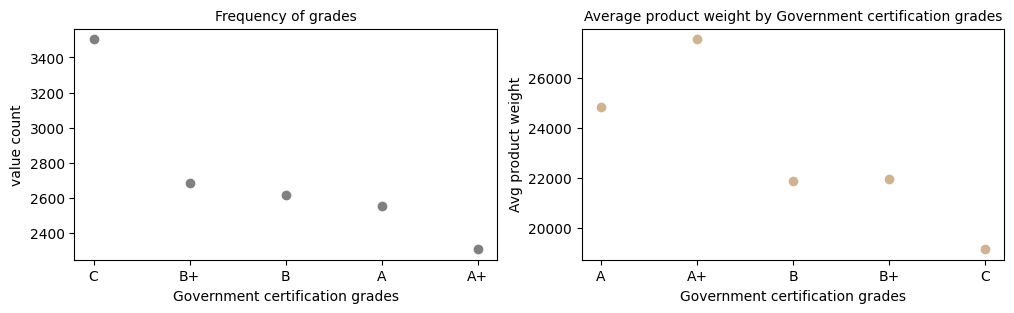

In [380]:
print("Unique values in Government certification grades", df['approved_wh_govt_certificate'].unique())
print('  ')
print(df.groupby('approved_wh_govt_certificate')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 3))

# Government certification
# plot 1
ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['approved_wh_govt_certificate'].value_counts()

plt.scatter(x.index, x.values, color='grey' , marker='o')
plt.xlabel('Government certification grades')
plt.title('Frequency of grades', fontsize=10)
plt.ylabel('value count')

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('approved_wh_govt_certificate')['product_wg_ton'].mean()

plt.scatter(x.index, x.values, color='tan', marker='o')
plt.title('Average product weight by Government certification grades', fontsize=10)
plt.xlabel('Government certification grades')
plt.ylabel('Avg product weight')

plt.show()

#### Type of approval by government

* The average product weight vs grades demonstrates a correlation between warehouses with the highest government approvals and the highest product weights.
* Although the C grade is the lowest designation, it corresponds to the highest total product weights, primarily because the majority of warehouses are categorized as C grade.




<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">govt checking in last 3 months</h1>

Unique values in govt checking in last 3 months [15 17 22 24  3  6  2 28  1 11  9 12 27 21 19  8 14 23 26 29 10 13 30 32
  7 25 31 20 16  5 18  4]
  
    govt_check_l3m  product_wg_ton
25              26        35419548
22              23        23782416
18              19        21713156
13              14        18560189
27              28        17055335
  


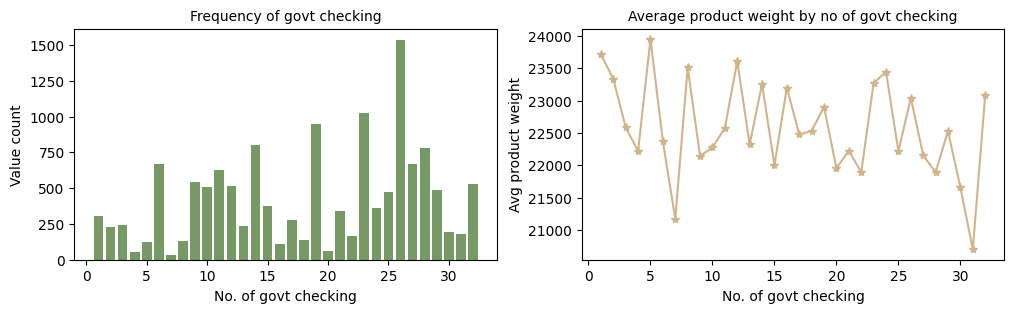

In [381]:
# govt_check_l3m
print("Unique values in govt checking in last 3 months" , df['govt_check_l3m'].unique())
print('  ')
print(df.groupby('govt_check_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))

# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['govt_check_l3m'].value_counts()

plt.bar(x.index, x.values, color='#769966')
plt.xlabel('No. of govt checking')
plt.ylabel('Value count')
plt.title('Frequency of govt checking', fontsize=10)

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('govt_check_l3m')['product_wg_ton'].mean()
plt.plot(x.index, x.values, color='tan', marker='*')
plt.xlabel('No. of govt checking')
plt.ylabel('Avg product weight')
plt.title('Average product weight by no of govt checking', fontsize=10)

plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">No. of workers</h1>

Unique values in No. of workers [29. 31. 37. 25. 35. 27. 23. 22. 16. 28. 36. 19. 24. 41. 17. 46. 30. 33.
 43. 32. 26. 20. 38. 39. 40. 44. 18. 11. 21. 34. 12. 42. 45. 15. 14. 13.]
  
    workers_num  product_wg_ton
17         28.0        30718822
16         27.0        17745300
15         26.0        17177844
18         29.0        16808714
13         24.0        16608375
  


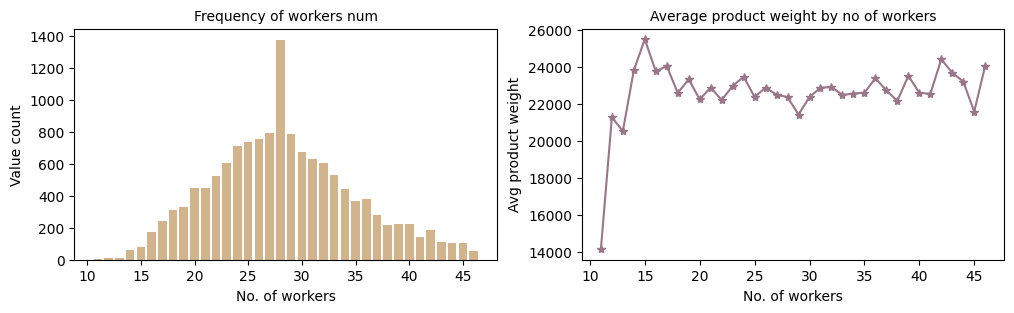

In [383]:
# workers_num
print("Unique values in No. of workers" , df['workers_num'].unique())
print('  ')
print(df.groupby('workers_num')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))

# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['workers_num'].value_counts()

plt.bar(x.index, x.values, color='tan')
plt.xlabel('No. of workers')
plt.ylabel('Value count')
plt.title('Frequency of workers num', fontsize=10)

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('workers_num')['product_wg_ton'].mean()
plt.plot(x.index, x.values, color='#997688', marker='*')
plt.xlabel('No. of workers')
plt.ylabel('Avg product weight')
plt.title('Average product weight by no of workers', fontsize=10)

plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Warehouse capacity size & Transport issue</h1>

Unique values in Warehouse capacity size ['Small' 'Large' 'Mid']
  
  WH_capacity_size  product_wg_ton
0            Large       126661150
1              Mid       125837633
2            Small        57519684
  
Unique values in Transport issue in 1 year [1 0 2]
  
   transport_issue_l1y  product_wg_ton
0                    0       223865313
1                    1        60983356
2                    2        25169798
  


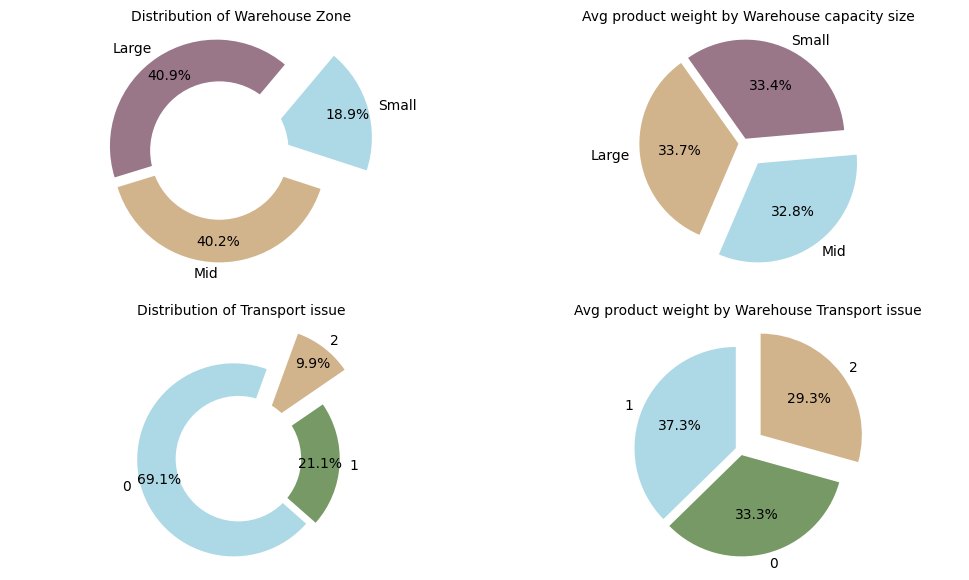

In [384]:
# Warehouse capacity size
print("Unique values in Warehouse capacity size", df['WH_capacity_size'].unique())
print('  ')
print(df.groupby('WH_capacity_size')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')
# Transport issue in 1 year
print("Unique values in Transport issue in 1 year", df['transport_issue_l1y'].unique())
print('  ')
print(df.groupby('transport_issue_l1y')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 7))

# Warehouse capacity size
# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0))

df['WH_capacity_size'].value_counts().plot(kind = 'pie', colors = ['#997688', 'tan', 'lightblue'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.45),
                                     startangle=50, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Warehouse Zone', fontsize=10)

# plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1))


x = df.groupby('WH_capacity_size')['product_wg_ton'].mean()
labels= df['WH_capacity_size'].unique()
plt.pie(x, colors =['#997688', 'tan', 'lightblue'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.25), startangle=5, labels = labels)
plt.axis('equal')
plt.title('Avg product weight by Warehouse capacity size', fontsize=10)

# transport issue in 1 year
# plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0))

df['transport_issue_l1y'].value_counts().plot(kind = 'pie', colors = ['lightblue', '#769966', 'tan'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.45),
                                     startangle=70, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Transport issue', fontsize=10)

# plot 4
ax4 = plt.subplot2grid((2, 2), (1, 1))


x = df.groupby('transport_issue_l1y')['product_wg_ton'].mean()
labels= df['transport_issue_l1y'].unique()
plt.pie(x, colors =['lightblue', '#769966', 'tan'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.25), startangle=90, labels = labels)
plt.axis('equal')
plt.title('Avg product weight by Warehouse Transport issue', fontsize=10)

plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Competitor_in_mkt</h1>

Unique values in No. of competitors in the market [2 4 3 5 1 7 6 0]
  
   Competitor_in_mkt  product_wg_ton
2                  2       106165497
3                  3        89655479
4                  4        83151338
5                  5        15817975
6                  6         7198673
1                  1         5473489
7                  7         2539960
0                  0           16056
  


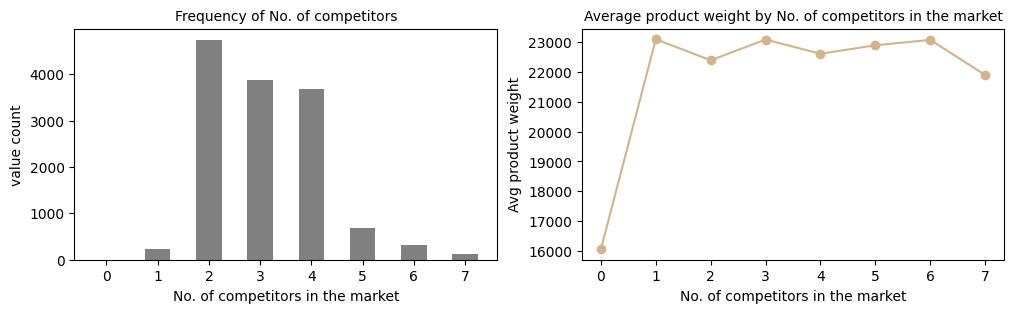

In [385]:
print("Unique values in No. of competitors in the market", df['Competitor_in_mkt'].unique())
print('  ')
print(df.groupby('Competitor_in_mkt')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 3))

# Government certification
# plot 1
ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['Competitor_in_mkt'].value_counts()

plt.bar(x.index, x.values, color='grey', width=0.5)
plt.xlabel('No. of competitors in the market')
plt.title('Frequency of No. of competitors', fontsize=10)
plt.ylabel('value count')

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('Competitor_in_mkt')['product_wg_ton'].mean()

plt.plot(x.index, x.values, color='tan', marker='o')
plt.title('Average product weight by No. of competitors in the market', fontsize=10)
plt.xlabel('No. of competitors in the market')
plt.ylabel('Avg product weight')

plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">No. of refill requirement in last 3 months</h1>

Unique values in No. of refill requirement in last 3 months [3 0 1 8 7 4 6 5 2]
  
   num_refill_req_l3m  product_wg_ton
3                   3        37729482
8                   8        37001301
0                   0        36320129
5                   5        36235617
7                   7        36045085
1                   1        35027919
4                   4        34737639
6                   6        34337971
2                   2        22583324
  


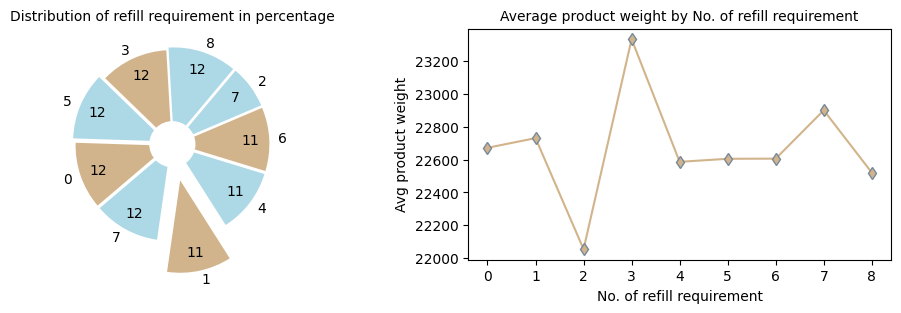

In [386]:
print("Unique values in No. of refill requirement in last 3 months", df['num_refill_req_l3m'].unique())
print('  ')
print(df.groupby('num_refill_req_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 3))

# plot 1
ax1 = plt.subplot2grid((1, 2), (0, 0))

df['num_refill_req_l3m'].value_counts().plot(kind = 'pie', colors = ['lightblue', 'tan'], autopct='%1.0f', explode=[0.05, 0.02, 0.08, 0.05, 0.05, 0.4, 0.05, 0.05, 0.05],
                                     startangle=50, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.25, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of refill requirement in percentage', fontsize=10)


# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('num_refill_req_l3m')['product_wg_ton'].mean()

plt.plot(x.index, x.values, color='tan', marker='d', markeredgecolor='lightslategrey')
plt.title('Average product weight by No. of refill requirement', fontsize=10)
plt.xlabel('No. of refill requirement')
plt.ylabel('Avg product weight')

plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Distance_from_hub & Distributor_num</h1>

Unique values in Distance from hub [ 91 210 161 112 152  77 241 124 150 225  95 242 129 190 231 261 159 189
  65 156 199  80 140  67 230 164 197 262 125  94 153 216 247 123 167 220
 134  64 196 240  85 253  66 229 168 110  69 239 237 113 181 255  90 151
  58 256  84  83 173 212 158 103  55 257  70 160  96 108 271 263 234 109
 198 182 114 166 141 165 204  60 254 227  78 248 252 105  79 232 171  92
 223 144  86 128 145  99 115 187 200 260 215 106 133 218 119 206 233 235
  81 264 142 186 246 211 221 175 195 170 149 214 157 146 101 270 228 174
 139 259  88 122 202  62 169  71 131  82 191  75 193 208 222  61 100 194
 224 238 267 127 107  57 269 138 147 148  97 236 118 205 143 177 154 251
 179 162 117 163 265  63 245 243 203  87  74 226  89 207 192 136 250 176
  72  56 183 126 201 102 135 184 219 217 155 132 213  59 188 130 120 111
  98 249 180  93 244 209 268 185 121 104 266 137 258  73  68  76 116 178
 172]
  
     dist_from_hub  product_wg_ton
29              84         1972276
90        

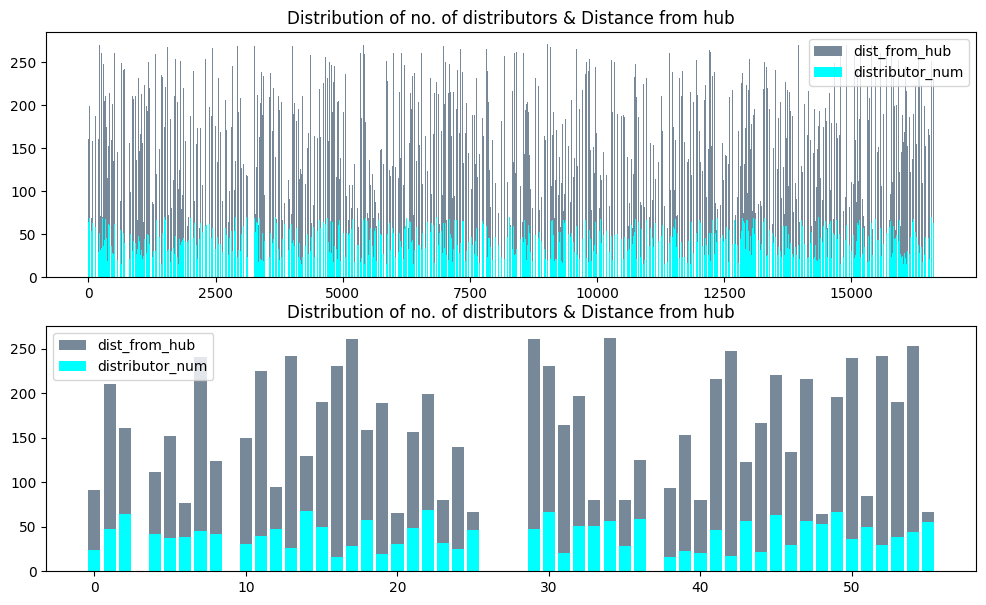

In [387]:
# dist_from_hub
print("Unique values in Distance from hub", df['dist_from_hub'].unique())
print('  ')
print(df.groupby('dist_from_hub')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')


# distributor_num
print("Unique values in No. distributors", df['distributor_num'].unique())
print('  ')
print(df.groupby('distributor_num')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')


plt.figure(figsize=(12, 7))

# plot 1

ax1 = plt.subplot2grid((2, 1), (0, 0)) 
# dist_from_hub
plt.bar(df.index, df['dist_from_hub'], label='dist_from_hub', color= 'lightslategrey')

# distributor_num
plt.bar(df.index, df['distributor_num'], label='distributor_num', color='cyan')

plt.title('Distribution of no. of distributors & Distance from hub')
plt.legend()

# plot 2

ax2 = plt.subplot2grid((2, 1), (1, 0)) 

# dist_from_hub
plt.bar(df.index[:50], df['dist_from_hub'][:50], label='dist_from_hub', color= 'lightslategrey')

# distributor_num
plt.bar(df.index[:50], df['distributor_num'][:50], label='distributor_num', color='cyan')

plt.title('Distribution of no. of distributors & Distance from hub')
plt.legend()

plt.show()

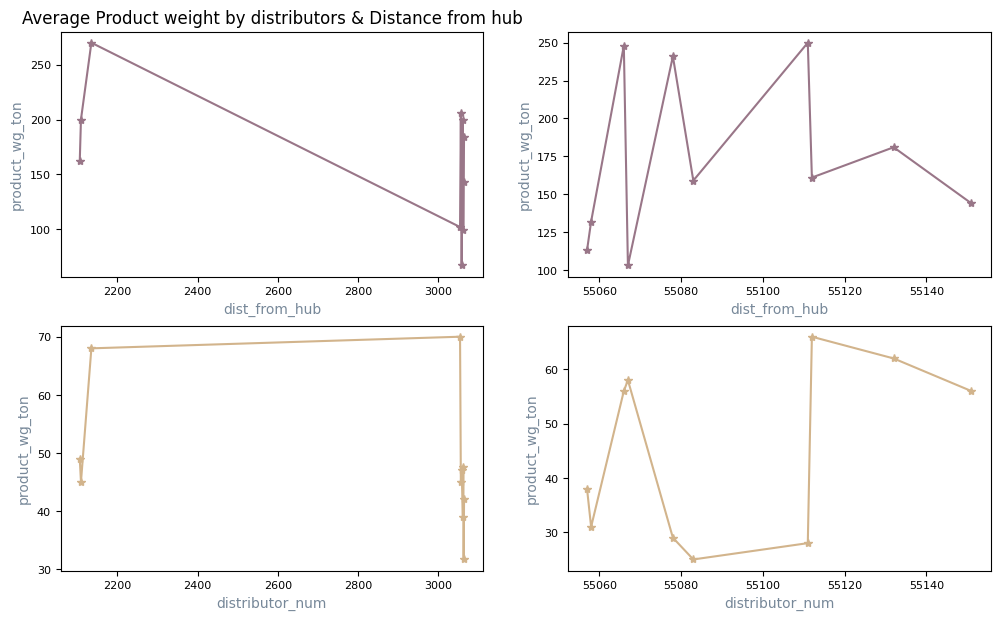

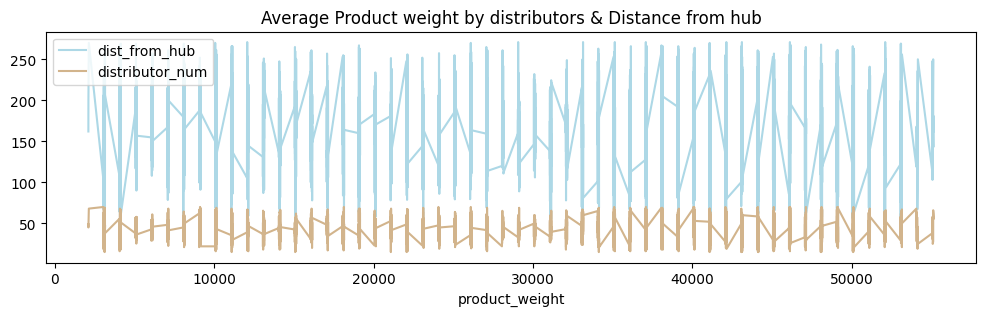

In [388]:
plt.figure(figsize=(12, 7))

# plot 1

ax1 = plt.subplot2grid((2, 2), (0, 0)) 
x = df.groupby('product_wg_ton')['dist_from_hub'].mean().head(10)

plt.plot(x.index, x.values, color='#997688', marker='*')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('dist_from_hub', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')
plt.title('Average Product weight by distributors & Distance from hub')

# plot 2

ax1 = plt.subplot2grid((2, 2), (0, 1)) 

x = df.groupby('product_wg_ton')['dist_from_hub'].mean().tail(10)

plt.plot(x.index, x.values, color='#997688', marker='*')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('dist_from_hub', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')

# plot 3

ax1 = plt.subplot2grid((2, 2), (1, 0)) 
x = df.groupby('product_wg_ton')['distributor_num'].mean().head(10)

plt.plot(x.index, x.values, color='tan', marker='*')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('distributor_num', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')

# plot 4

ax1 = plt.subplot2grid((2, 2), (1, 1)) 

x = df.groupby('product_wg_ton')['distributor_num'].mean().tail(10)

plt.plot(x.index, x.values, color='tan', marker='*')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('distributor_num', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')


cols = ['dist_from_hub', 'distributor_num']
grouped = df.groupby('product_wg_ton')[cols].mean()
fig, ax = plt.subplots(figsize=(12, 3))
grouped.plot(kind='line', ax=ax, color=['lightblue', 'tan'])
ax.set_xlabel('product_weight')


plt.title('Average Product weight by distributors & Distance from hub')
plt.show()

In [389]:
df_copy = df.copy()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Retail shop number</h1>

In [390]:
print("Total no. of unique values in no. of retail shops", len(df['retail_shop_num'].unique()))
print('  ')

# define bin edges : 
# Retail shop number : min value = 1821, max value = 11008

bins =[1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000]

# cut the column into bins
df_copy['bins'] = pd.cut(df_copy['retail_shop_num'], bins)

bin_counts = df_copy['bins'].value_counts().sort_index()

# Create a DataFrame from bin_counts
table_df = pd.DataFrame({'Bin': bin_counts.index, 'Count': bin_counts.values})

# Display the table
print(table_df)

Total no. of unique values in no. of retail shops 3690
  
              Bin  Count
0    (1500, 3000]    141
1    (3000, 4500]   4559
2    (4500, 6000]   7394
3    (6000, 7500]   1567
4    (7500, 9000]      0
5   (9000, 10500]      0
6  (10500, 12000]      0


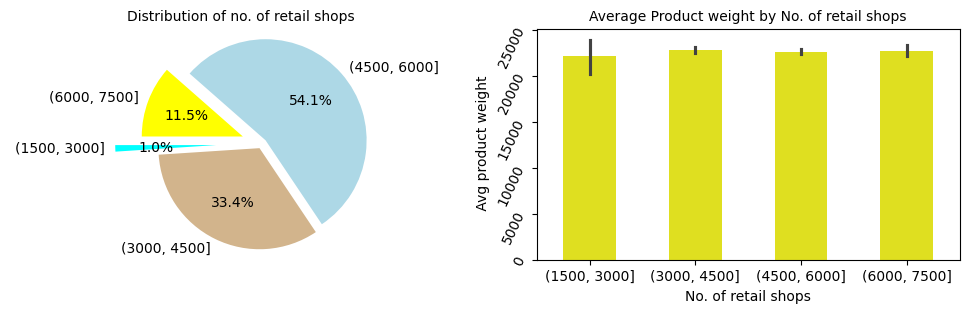

In [392]:
plt.figure(figsize=(12, 3))

# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0)) 

# define bin edges
bins =[1500, 3000, 4500, 6000, 7500]

# cut the column into bins
df_copy['bins'] = pd.cut(df_copy['retail_shop_num'], bins)

#plot bargraph
df_copy['bins'].value_counts().sort_index().plot(kind='pie',  colors = ['cyan', 'tan', 'lightblue', 'yellow'], autopct='%1.1f%%', explode=(0.45, 0.05, 0.05, 0.2),
                                     startangle=180, ylabel='  ')
plt.axis('equal')
plt.title('Distribution of no. of retail shops', fontsize=10)


# plot 1

ax2 = plt.subplot2grid((1, 2), (0, 1)) 
sns.barplot(data=df_copy, x='bins', y='product_wg_ton', color='yellow', width=0.5)
plt.ylabel(' Avg product weight')
plt.xlabel('No. of retail shops')
plt.title('Average Product weight by No. of retail shops', fontsize=10)
plt.yticks(rotation=65)
plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Transformation</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Encoding</h1>

In [393]:
# Numerical columns & categorical columns in train dataset

num_columns_train=[i for i in df.columns if df[i].dtypes != 'O']
cat_columns_train=[i for i in df.columns if df[i].dtypes == 'O']

# Numerical columns & categorical columns in test dataset

num_columns_test=[i for i in df_test.columns if df_test[i].dtypes != 'O']
cat_columns_test=[i for i in df_test.columns if df_test[i].dtypes == 'O']


In [394]:
# Label Encoding for categorical variables
 
for i in cat_columns_train:
    df[i] = LabelEncoder().fit_transform(df[i])

for i in cat_columns_test:
    df_test[i] = LabelEncoder().fit_transform(df_test[i])

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Scaling</h1>

In [395]:
# display number of unique values in each column
df.nunique().sort_values(ascending=False)

product_wg_ton                  4145
retail_shop_num                 3690
dist_from_hub                    217
distributor_num                   56
storage_issue_reported_l3m        37
workers_num                       36
govt_check_l3m                    32
num_refill_req_l3m                 9
Competitor_in_mkt                  8
wh_breakdown_l3m                   7
WH_regional_zone                   6
approved_wh_govt_certificate       5
zone                               4
transport_issue_l1y                3
WH_capacity_size                   3
wh_owner_type                      2
electric_supply                    2
temp_reg_mach                      2
Location_type                      2
dtype: int64

In [396]:
columns_with_more_than_two_unique_values_train = df.columns[df.nunique()>2]

In [397]:
columns_with_more_than_two_unique_values_test = df_test.columns[df_test.nunique()>2]

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13661 entries, 0 to 16619
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 13661 non-null  int32  
 1   WH_capacity_size              13661 non-null  int32  
 2   zone                          13661 non-null  int32  
 3   WH_regional_zone              13661 non-null  int32  
 4   num_refill_req_l3m            13661 non-null  int64  
 5   transport_issue_l1y           13661 non-null  int64  
 6   Competitor_in_mkt             13661 non-null  int64  
 7   retail_shop_num               13661 non-null  int64  
 8   wh_owner_type                 13661 non-null  int32  
 9   distributor_num               13661 non-null  int64  
 10  electric_supply               13661 non-null  int64  
 11  dist_from_hub                 13661 non-null  int64  
 12  workers_num                   13661 non-null  float64
 13  storag

In [399]:
# Standard Scaling for numerical variables

for i in columns_with_more_than_two_unique_values_train:
  df[i] = StandardScaler().fit_transform(df[[i]])

for i in columns_with_more_than_two_unique_values_test:
  df_test[i] = StandardScaler().fit_transform(df_test[[i]])

In [400]:
df.sample(5).T

,6745,284,791,8189,12151
Location_type,0.000000,0.000000,0.000000,0.000000,0.000000
WH_capacity_size,-1.052873,0.296278,1.645428,0.296278,0.296278
zone,0.132591,1.268220,-1.003038,0.132591,1.268220
WH_regional_zone,1.049191,-0.154807,-1.960805,-1.358806,-0.154807
num_refill_req_l3m,-1.565849,-1.183066,1.113632,0.730849,-1.565849
transport_issue_l1y,-0.615992,-0.615992,0.892896,-0.615992,-0.615992
Competitor_in_mkt,0.822475,0.822475,-0.082181,-0.986838,-0.082181
retail_shop_num,-0.393507,-1.455533,0.194975,1.160454,-0.446378
wh_owner_type,0.000000,0.000000,1.000000,0.000000,1.000000
distributor_num,1.276177,1.587022,-1.024082,0.530147,-0.278052


In [401]:
df_test.sample(5).T

,4930,5463,3562,1403,4195
Location_type,0.000000,0.000000,0.000000,0.000000,0.000000
WH_capacity_size,-1.060205,-1.060205,-1.060205,0.277119,1.614443
zone,0.144374,1.281316,-0.992569,-0.992569,1.281316
WH_regional_zone,0.457291,0.457291,1.052559,-0.137977,1.052559
num_refill_req_l3m,0.000919,-0.383500,0.000919,-1.536757,-1.536757
transport_issue_l1y,0.863054,-0.629121,0.863054,-0.629121,-0.629121
Competitor_in_mkt,-1.014014,0.850993,-1.014014,-1.014014,0.850993
retail_shop_num,-1.103199,-0.688544,0.356156,0.146525,-0.053892
wh_owner_type,0.000000,1.000000,1.000000,0.000000,0.000000
distributor_num,-0.256744,-1.508481,1.558276,0.243951,0.494299


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Feature Selection</h1>

In [402]:
# correlation heatmap

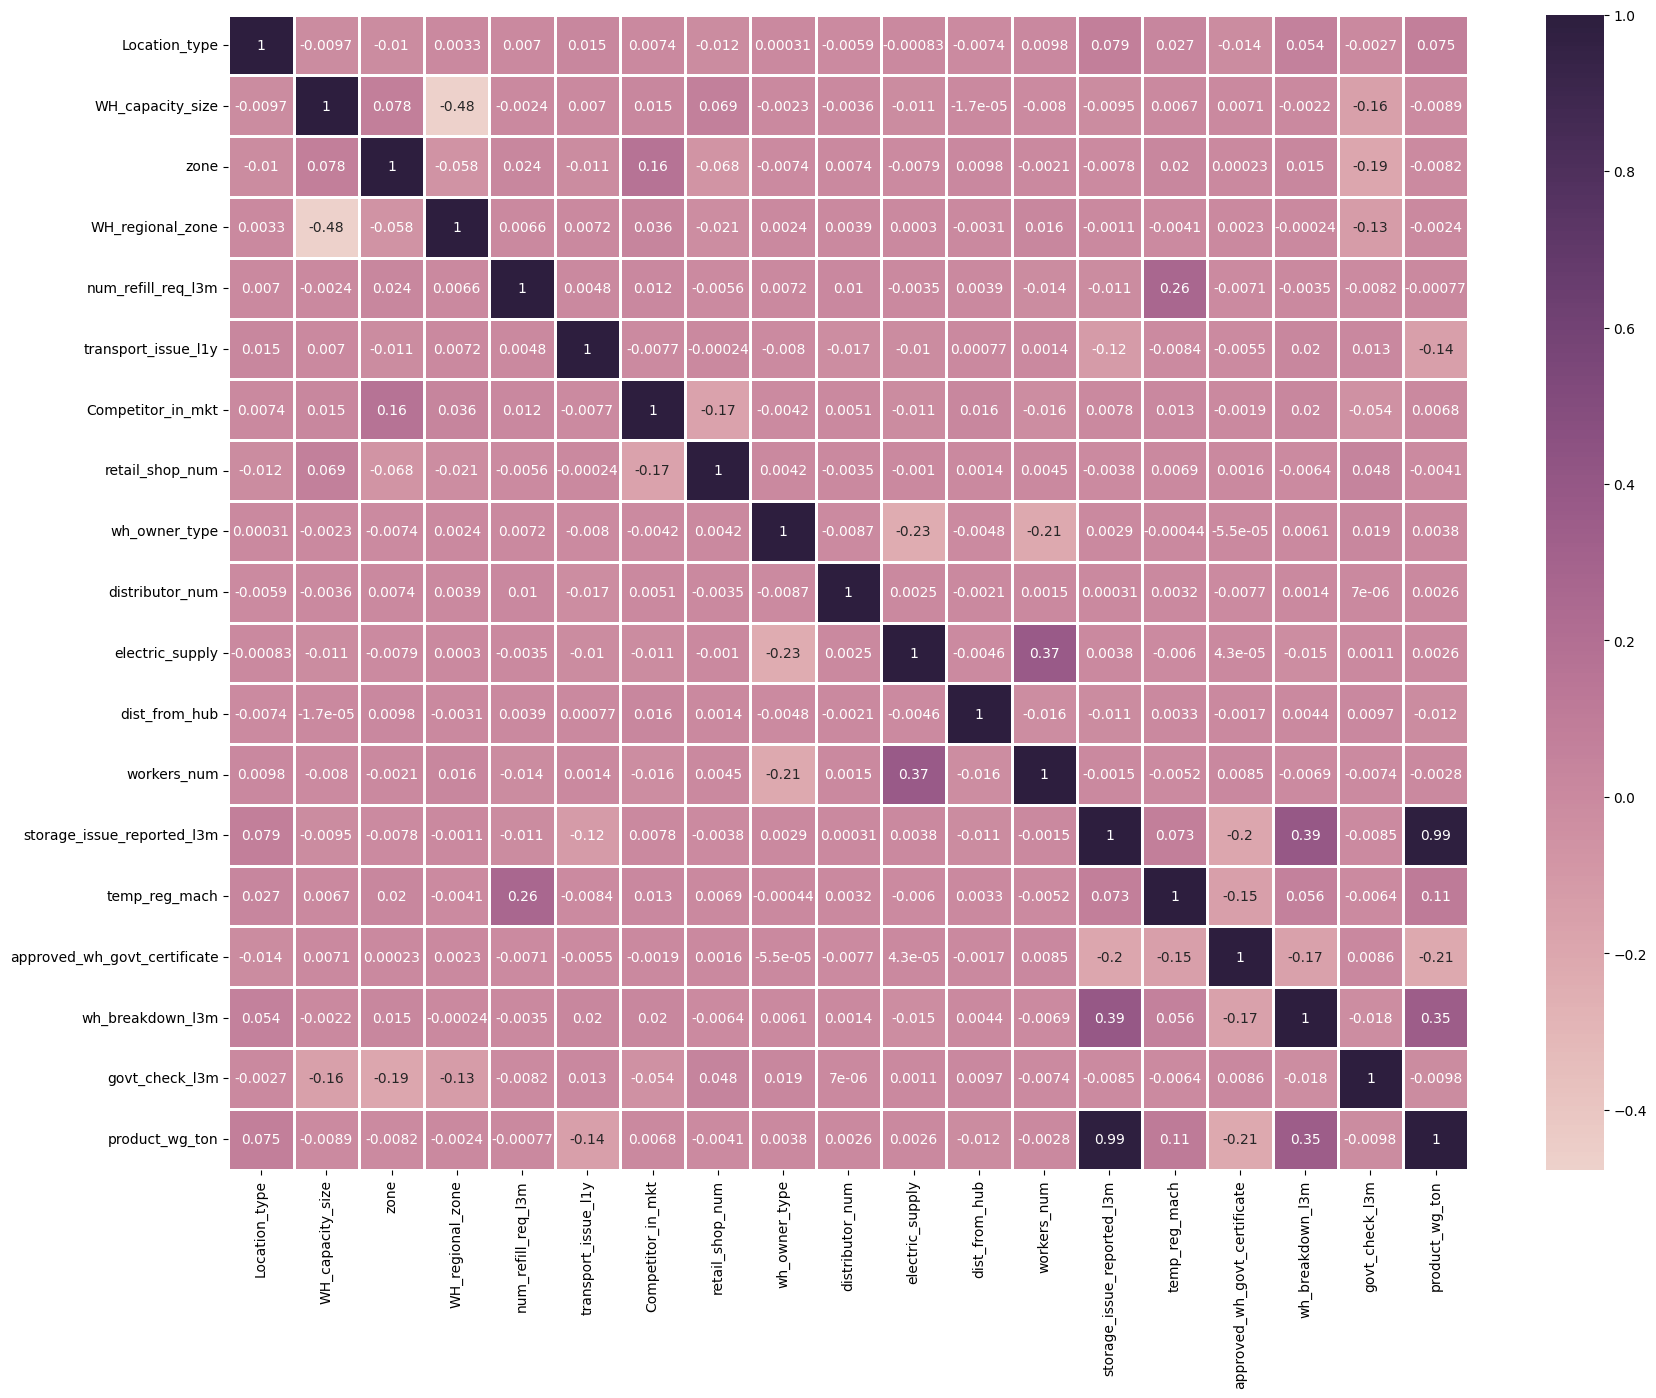

In [403]:
plt.figure(figsize=(20, 15))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=1)
plt.show()

In [404]:
data = df.loc[:, df.columns !='product_wg_ton']
correlations = data.corrwith(df['product_wg_ton']).round(3).sort_values(ascending=True)
correlations

approved_wh_govt_certificate   -0.209
transport_issue_l1y            -0.142
dist_from_hub                  -0.012
govt_check_l3m                 -0.010
WH_capacity_size               -0.009
zone                           -0.008
retail_shop_num                -0.004
workers_num                    -0.003
WH_regional_zone               -0.002
num_refill_req_l3m             -0.001
distributor_num                 0.003
electric_supply                 0.003
wh_owner_type                   0.004
Competitor_in_mkt               0.007
Location_type                   0.075
temp_reg_mach                   0.109
wh_breakdown_l3m                0.351
storage_issue_reported_l3m      0.986
dtype: float64

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Splitting Dataset</h1>

In [405]:
#Selecting Independent (Features) & Dependent(Target) variables

X_train = df.drop(['product_wg_ton'], axis=1)
Y_train = df['product_wg_ton']

X_test = df_test.drop(['product_wg_ton'], axis=1)
Y_test = df_test['product_wg_ton']

In [406]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (13661, 18)
Shape of X_test: (4599, 18)


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Modelling</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Regression Models</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Linear Regression</h1>

In [407]:
# Initialize the model

LRmodel = LinearRegression()

In [408]:
# Fit model to the training data

LRmodel.fit(X_train, Y_train)

LinearRegression()

In [409]:
# Make predictions on the test data

LR_predicted = LRmodel.predict(X_test)

In [410]:
# Evaluate  the model

# r2 score
lr_r2 = r2_score(Y_test, LR_predicted).round(3)
print('R2 score:  ', lr_r2)

# mean squared error (MSE)
lr_mse = mean_squared_error(Y_test, LR_predicted).round(3)
print('Mean Squared Error:  ', lr_mse)

# root mean squared error (RMSE)
lr_rmse = np.sqrt(mean_squared_error(Y_test, LR_predicted)).round(3)
print('Root Mean Squared Error:  ', lr_rmse) 

# mean absolute error (MAE)
lr_mae = mean_absolute_error(Y_test, LR_predicted).round(3)
print('Mean Absolute Error:  ', lr_mae)


R2 score:   0.976
Mean Squared Error:   0.024
Root Mean Squared Error:   0.154
Mean Absolute Error:   0.114


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Decision Tree</h1>

In [411]:
# Initialize the model

DTmodel = DecisionTreeRegressor(random_state = 0) 

In [412]:
# Fit model to the training data

DTmodel.fit(X_train, Y_train) 

DecisionTreeRegressor(random_state=0)

In [413]:
# Make predictions on the test data

DT_predicted = DTmodel.predict(X_test)

In [414]:
# Evaluate  the model

# r2 score
dt_r2 = r2_score(Y_test, DT_predicted).round(3)
print('R2 score:  ', dt_r2)

# mean squared error (MSE)
dt_mse = mean_squared_error(Y_test, DT_predicted).round(3)
print('Mean Squared Error:  ', dt_mse)

# root mean squared error (RMSE)
dt_rmse = np.sqrt(mean_squared_error(Y_test, DT_predicted)).round(3)
print('Root Mean Squared Error:  ', dt_rmse) 

# mean absolute error (MAE)
dt_mae = mean_absolute_error(Y_test, DT_predicted).round(3)
print('Mean Absolute Error:  ', dt_mae)


R2 score:   0.986
Mean Squared Error:   0.014
Root Mean Squared Error:   0.118
Mean Absolute Error:   0.083


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Random Forest</h1>

In [415]:
# Initialize the model

RFmodel = RandomForestRegressor(n_estimators = 100, max_depth = 4, random_state = 0) 

In [416]:
# Fit model to the training data

RFmodel.fit(X_train, Y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [417]:
# Make predictions on the test data

RF_predicted = RFmodel.predict(X_test)

In [418]:
# Evaluate  the model

# r2 score
rf_r2 = r2_score(Y_test, RF_predicted).round(3)
print('R2 score:  ', rf_r2)

# mean squared error (MSE)
rf_mse = mean_squared_error(Y_test, RF_predicted).round(3)
print('Mean Squared Error:  ', rf_mse)

# root mean squared error (RMSE)
rf_rmse = np.sqrt(mean_squared_error(Y_test, RF_predicted)).round(3)
print('Root Mean Squared Error:  ', rf_rmse) 

# mean absolute error (MAE)
rf_mae = mean_absolute_error(Y_test, RF_predicted).round(3)
print('Mean Absolute Error:  ', rf_mae)


R2 score:   0.981
Mean Squared Error:   0.019
Root Mean Squared Error:   0.139
Mean Absolute Error:   0.107


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Support Vector Machine</h1>

In [419]:
# Initialize the model

SVmodel = SVR() 

In [420]:
# Fit model to the training data

SVmodel.fit(X_train, Y_train) 

SVR()

In [421]:
# Make predictions on the test data

SV_predicted = SVmodel.predict(X_test) 

In [422]:
# Evaluate  the model

# r2 score
sv_r2 = r2_score(Y_test, SV_predicted).round(3)
print('R2 score:  ', sv_r2)

# mean squared error (MSE)
sv_mse = mean_squared_error(Y_test, SV_predicted).round(3)
print('Mean Squared Error:  ', sv_mse)

# root mean squared error (RMSE)
sv_rmse = np.sqrt(mean_squared_error(Y_test, SV_predicted)).round(3)
print('Root Mean Squared Error:  ', sv_rmse) 

# mean absolute error (MAE)
sv_mae = mean_absolute_error(Y_test, SV_predicted).round(3)
print('Mean Absolute Error:  ', sv_mae)

R2 score:   0.986
Mean Squared Error:   0.014
Root Mean Squared Error:   0.117
Mean Absolute Error:   0.089


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Gradient Boosting</h1>

In [423]:
# Initialize the model

GBmodel = GradientBoostingRegressor()

In [424]:
# Fit model to the training data

GBmodel.fit(X_train,Y_train)

GradientBoostingRegressor()

In [425]:
# Make predictions on the test data

GB_predicted = GBmodel.predict(X_test)

In [426]:
# Evaluate  the model

# r2 score
gb_r2 = r2_score(Y_test, GB_predicted).round(3)
print('R2 score:  ', gb_r2)

# mean squared error (MSE)
gb_mse = mean_squared_error(Y_test, GB_predicted).round(3)
print('Mean Squared Error:  ', gb_mse)

# root mean squared error (RMSE)
gb_rmse = np.sqrt(mean_squared_error(Y_test, GB_predicted)).round(3)
print('Root Mean Squared Error:  ', gb_rmse) 

# mean absolute error (MAE)
gb_mae = mean_absolute_error(Y_test, GB_predicted).round(3)
print('Mean Absolute Error:  ', gb_mae)

R2 score:   0.993
Mean Squared Error:   0.007
Root Mean Squared Error:   0.082
Mean Absolute Error:   0.062


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px"> Actual vs Predicted Values</h1>

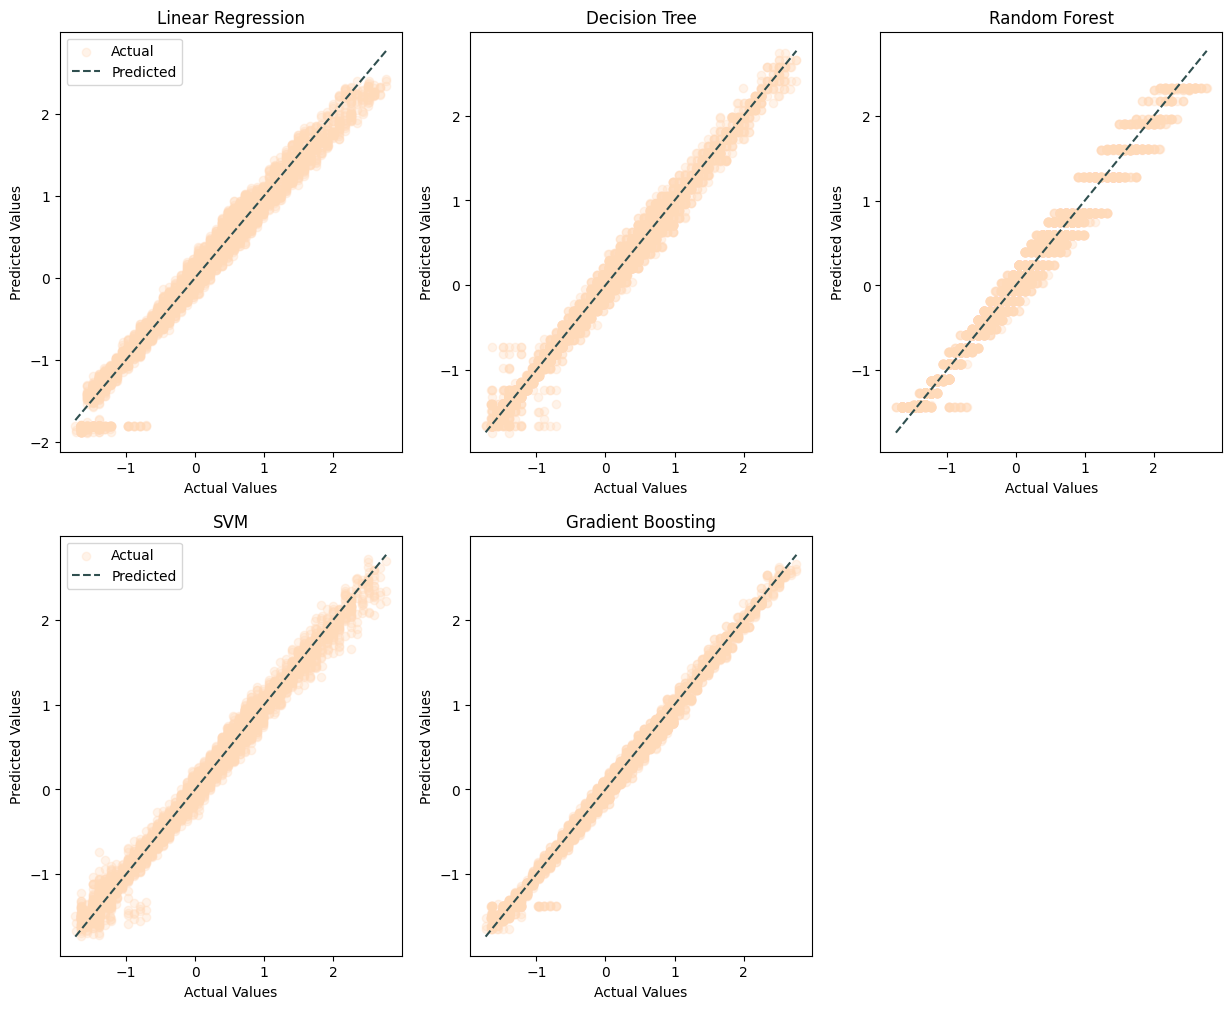

In [427]:
plt.figure(figsize=(15, 12))


# linear regression

ax1 = plt.subplot2grid((2, 3), (0, 0))
plt.scatter(Y_test, LR_predicted, color='#ffdab9', alpha=0.3, label='Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f', label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# decision tree

ax1 = plt.subplot2grid((2, 3), (0, 1))
plt.scatter(Y_test, DT_predicted, color='#ffdab9', alpha=0.3)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f')
plt.title('Decision Tree')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# random forest

ax1 = plt.subplot2grid((2, 3), (0, 2))
plt.scatter(Y_test, RF_predicted, color='#ffdab9', alpha=0.3)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f')
plt.title('Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# svm

ax1 = plt.subplot2grid((2, 3), (1, 0))
plt.scatter(Y_test, SV_predicted, color='#ffdab9', alpha=0.3, label='Actual')  # alpha controls point transparency for better visualization
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f', label='Predicted')
plt.title('SVM')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# gb

ax1 = plt.subplot2grid((2, 3), (1, 1))
plt.scatter(Y_test, GB_predicted, color='#ffdab9', alpha=0.3)  # alpha controls point transparency for better visualization
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--',color='#2f4f4f')
plt.title('Gradient Boosting')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px"> Metrics Table Evaluation</h1>

In [428]:
Metrics = pd.DataFrame({'Model':('Linear Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting'),
                       'R2 Score': (lr_r2, dt_r2, rf_r2, sv_r2, gb_r2),
                       'Root Mean Squared Error': (lr_rmse, dt_rmse, rf_rmse, sv_rmse, gb_rmse),
                       'Mean Absolute Error': (lr_mae, dt_mae, rf_mae, sv_mae, gb_mae),
                        'Mean Squared Error': (lr_mse, dt_mse, rf_mse, sv_mse, gb_mse)
                      })
Metrics

,Model,R2 Score,Root Mean Squared Error,Mean Absolute Error,Mean Squared Error
0,Linear Regression,0.976,0.154,0.114,0.024
1,Decision Tree,0.986,0.118,0.083,0.014
2,Random Forest,0.981,0.139,0.107,0.019
3,SVM,0.986,0.117,0.089,0.014
4,Gradient Boosting,0.993,0.082,0.062,0.007


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 25px"> Conclusion </h1>

##### After evaluating each model's performance on both training and testing data, considering metrics such as 'R2 Score', 'Root Mean Squared Error', 'Mean Absolute Error', and 'Mean Squared Error', it was found that **Gradient Boosting Regression Model** outperformed the others consistently across all metrics.
##### Therefore Gradient Boosting Regression model is the most suitable choice for this dataset. 
